In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import load_sample_image


In [3]:
flower = load_sample_image('flower.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


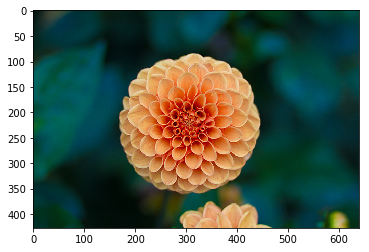

In [4]:
plt.imshow(flower)

In [5]:
flower # numbers are between 0 and 255

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [6]:
#normalize between 0 and 1

In [7]:
data = flower/255

In [8]:
data.shape

(427, 640, 3)

In [11]:
data[0,0,1]

0.07450980392156863

In [12]:
427*640

273280

In [13]:
data = data.reshape(-1,3) #or 273280 write -1

In [14]:
data.shape

(273280, 3)

In [18]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [40]:
kmeans= MiniBatchKMeans(n_clusters=8)

In [41]:
kmeans.fit(data)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=8,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [42]:
kmeans.labels_


array([0, 0, 0, ..., 6, 6, 6])

In [43]:
new_data = kmeans.cluster_centers_[kmeans.labels_]

In [44]:
new_data.shape

(273280, 3)

In [45]:
new_flower = new_data.reshape(427, 640, 3)

In [46]:
new_flower.shape

(427, 640, 3)

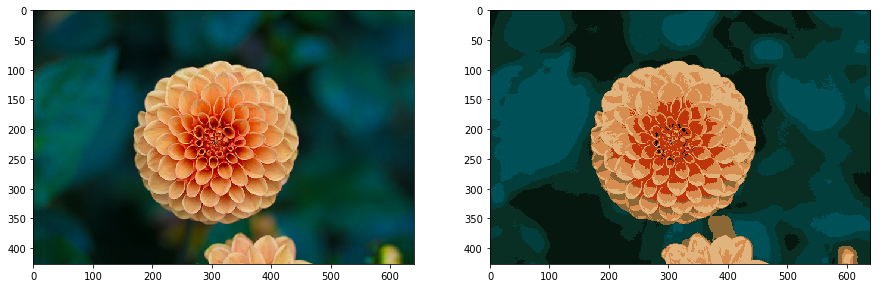

In [47]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].imshow (flower)
axes[1].imshow(new_flower)

In [59]:
pictures  = []
for k in [2, 4, 8, 16, 32, 64, 128, 256]:
    kmeans = MiniBatchKMeans(n_clusters=k)
    kmeans.fit(data)
    new_pic = kmeans.cluster_centers_[kmeans.labels_].reshape(427,640,3)
    pictures.append(new_pic)

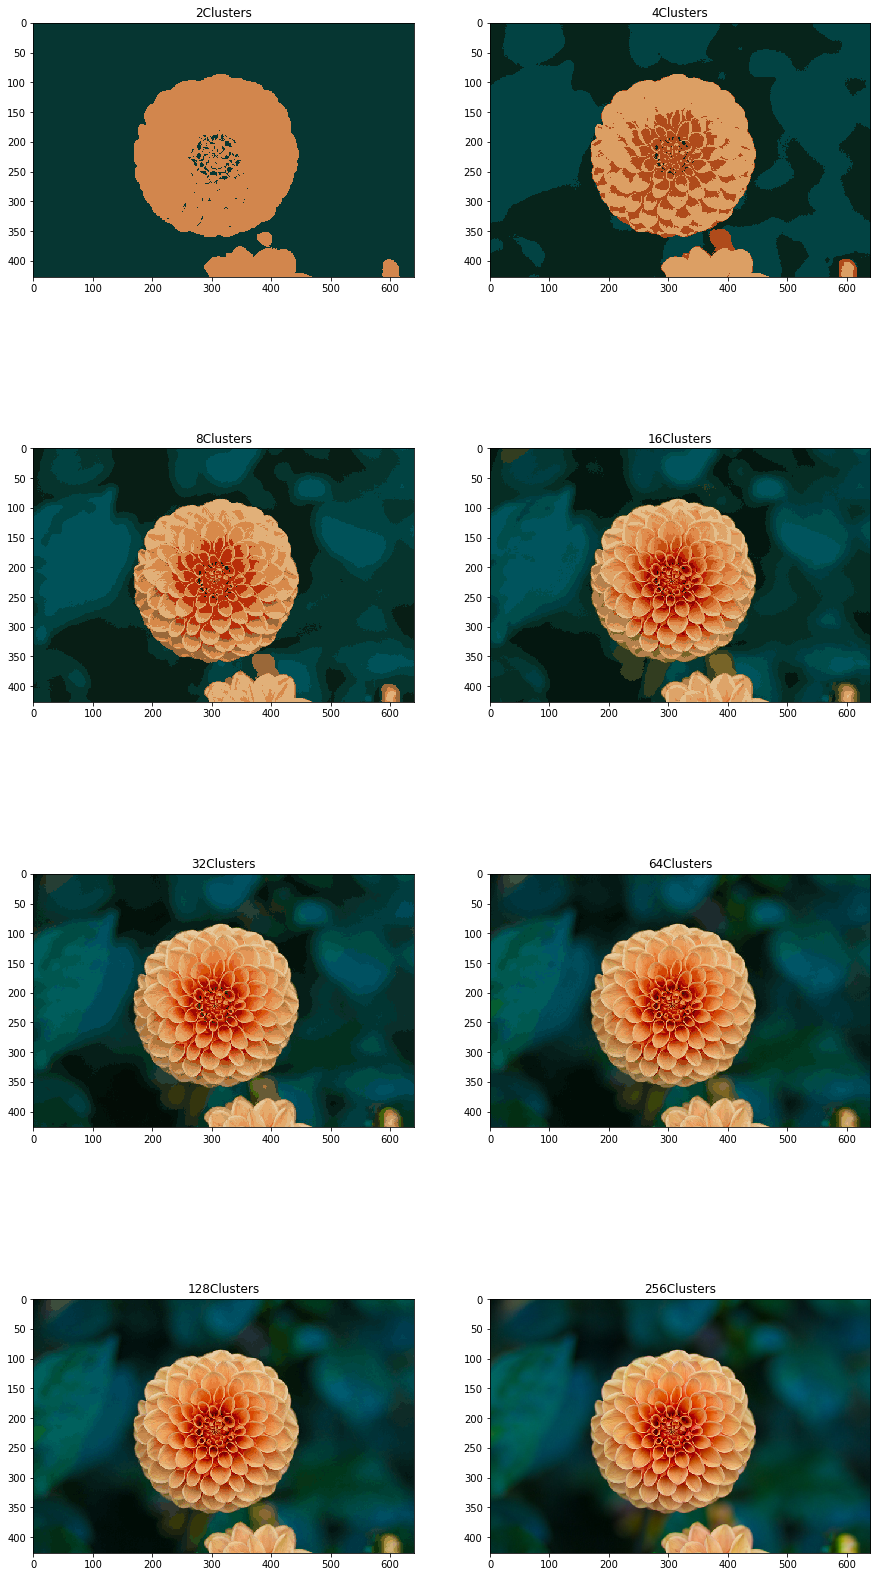

In [71]:
fig, axes = plt.subplots(4,2, figsize=(15,30))
i=1
for row in range(4):
    for col in range(2):
        axes[row][col].imshow(pictures[i-1])
        axes[row][col].set_title(f'{2**i}Clusters')
        i+=1
plt.imshow(flower)